# CV003 Mini-Project Group EN2

# Members:  Wong Kok Zee Julius, Ryan Tan Jun Ee, Sherlyn Pay Zhi Ning, Tey Min Ying Phoebe, Ong Wen Jun Joel

# Problem: How to choose the best BTO so that you can sell it at the highest price after 15 years?

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # set the default Seaborn style for graphics

In [3]:
# importing complete data into pandas
# data source: https://www.kaggle.com/lizexi/singapore-public-housing-dataset?select=resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv

geocode_data1 = pd.read_csv('all_geocoded.csv')
geocode_data1.head()

,month,town,flat_type,addresses,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,searchval,X,Y,lat,long,distanceWithMrt,distanceWithRaffles,distanceWithGdPri
0,2018-01,ANG MO KIO,2 ROOM,314 ANG MO KIO AVE 3,10 TO 12,44.0,Improved,1978,59 years 01 month,250000.0,TECK GHEE EVERGREEN,29865.99805,38695.97027,1.366227,103.850086,416.686149,9162.186778,1396.420210
1,2018-01,ANG MO KIO,3 ROOM,109 ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,59 years 07 months,240000.0,KEBUN BARU HEIGHTS,28486.23758,39123.83010,1.370097,103.837688,1321.143682,9713.392312,552.239946
2,2018-01,ANG MO KIO,3 ROOM,150 ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1981,62 years,240000.0,YIO CHU KANG GROVE,28968.13327,39865.81646,1.376807,103.842018,640.152689,10391.930070,879.171242
3,2018-01,ANG MO KIO,3 ROOM,559 ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1980,61 years,242000.0,CHENG SAN PLACE,30730.76021,39223.53457,1.370998,103.857856,931.080675,9718.096454,1885.848306
4,2018-01,ANG MO KIO,3 ROOM,461 ANG MO KIO AVE 10,10 TO 12,68.0,New Generation,1980,61 years 01 month,255000.0,HDB-ANG MO KIO,30681.04009,38839.80113,1.367528,103.857410,913.873510,9329.200120,1984.578623


In [3]:
geocode_data1.describe()

,floor_area_sqm,lease_commence_date,resale_price,X,Y,lat,long,distanceWithMrt,distanceWithRaffles,distanceWithGdPri
count,57386.000000,57386.000000,5.738600e+04,57386.000000,57386.000000,57386.000000,57386.000000,57386.000000,57386.000000,57386.000000
mean,97.562071,1994.508783,4.368019e+05,28607.713719,38954.619920,1.368565,103.838779,791.133415,12544.680069,955.619552
std,24.409666,13.079156,1.545978e+05,7949.630412,4765.624621,0.043099,0.071433,450.492933,4426.917987,617.489090
min,31.000000,1966.000000,1.400000e+05,11519.146490,28097.635140,1.270380,103.685228,36.182785,588.027438,45.719483
25%,82.000000,1984.000000,3.250000e+05,21514.563280,35581.180370,1.338058,103.775043,462.485974,9754.164444,491.824612
50%,94.000000,1995.000000,4.058880e+05,29280.446800,38858.651450,1.367695,103.844825,705.355228,13407.843447,824.291384
75%,113.000000,2004.000000,5.150000e+05,35212.470040,41998.481040,1.396093,103.898128,1014.511931,15758.719700,1277.402398
max,237.000000,2019.000000,1.232000e+06,45192.299290,48741.058570,1.457071,103.987805,4621.139339,20249.812140,3527.504681


# Cleanining Data to extract relevant data from complete dataset

In [4]:
# extracting relevant columns of data

geocode_data = pd.DataFrame(geocode_data1[["town", "addresses", "flat_type", "storey_range", "floor_area_sqm", 
                                           "distanceWithMrt", "lat", "long", "lease_commence_date", "resale_price"]])
geocode_data.head()

,town,addresses,flat_type,storey_range,floor_area_sqm,distanceWithMrt,lat,long,lease_commence_date,resale_price
0,ANG MO KIO,314 ANG MO KIO AVE 3,2 ROOM,10 TO 12,44.0,416.686149,1.366227,103.850086,1978,250000.0
1,ANG MO KIO,109 ANG MO KIO AVE 4,3 ROOM,01 TO 03,67.0,1321.143682,1.370097,103.837688,1978,240000.0
2,ANG MO KIO,150 ANG MO KIO AVE 5,3 ROOM,01 TO 03,68.0,640.152689,1.376807,103.842018,1981,240000.0
3,ANG MO KIO,559 ANG MO KIO AVE 10,3 ROOM,01 TO 03,68.0,931.080675,1.370998,103.857856,1980,242000.0
4,ANG MO KIO,461 ANG MO KIO AVE 10,3 ROOM,10 TO 12,68.0,913.873510,1.367528,103.857410,1980,255000.0


In [5]:
# Removing data points that are not part of our timeframe of analysis 
# Only keep data points where the lease commence data is from 2005

is_leasecommence = geocode_data['lease_commence_date']>=2005
leasecommence_2005 = geocode_data[is_leasecommence]

leasecommence_2005.head(5)

,town,addresses,flat_type,storey_range,floor_area_sqm,distanceWithMrt,lat,long,lease_commence_date,resale_price
43,ANG MO KIO,309A ANG MO KIO ST 31,4 ROOM,04 TO 06,95.0,722.809564,1.365029,103.845301,2006,575000.0
44,ANG MO KIO,307C ANG MO KIO AVE 1,4 ROOM,16 TO 18,88.0,689.479121,1.365561,103.845169,2012,635000.0
49,ANG MO KIO,588D ANG MO KIO ST 52,5 ROOM,04 TO 06,112.0,522.292035,1.371754,103.853883,2011,608000.0
51,ANG MO KIO,588C ANG MO KIO ST 52,5 ROOM,19 TO 21,117.0,504.160578,1.371832,103.853671,2011,873388.0
52,ANG MO KIO,588B ANG MO KIO ST 52,5 ROOM,28 TO 30,120.0,459.981405,1.371976,103.853151,2011,875000.0


In [6]:
# converting storey_range from object to integer:
story_range = pd.DataFrame(leasecommence_2005['storey_range']) #creating a separate Dataframe for storey_range

#x = int(leasecommence_2005['storey_range'])
#intflat_type = list(map(int, leasecommence_2005['storey_range']))

story_rangenum = leasecommence_2005['storey_range'].replace({'01 TO 03': '2', '04 TO 06': '5', '07 TO 09': '8', '10 TO 12': '11', '13 TO 15': '14', '16 TO 18': '17','19 TO 21': '20','22 TO 24': '23','25 TO 27': '26','28 TO 30': '29','31 TO 33': '32','34 TO 36': '35','37 TO 39': '38','40 TO 42': '41','43 TO 45': '44','46 TO 48': '47','49 TO 51': '50' })

range = pd.DataFrame(story_rangenum)

# Converting object to integers
range['storey_range'] = range['storey_range'].astype(str).astype(int)

# Renaming column
floor = range.rename(columns = {'storey_range' : 'floor'})

In [8]:
# Merging floor as integers with targeted time frame data

BTO_data = pd.concat([leasecommence_2005, floor], axis=1).reindex(leasecommence_2005.index)
BTO_data.describe()

,floor_area_sqm,distanceWithMrt,lat,long,lease_commence_date,resale_price,floor
count,13395.000000,13395.000000,13395.000000,13395.000000,13395.000000,1.339500e+04,13395.000000
mean,90.318104,940.604468,1.378999,103.851841,2012.860470,4.997957e+05,11.555655
std,16.936243,567.106830,0.042818,0.061758,2.890338,1.697444e+05,7.473118
min,40.000000,65.874435,1.273477,103.694486,2005.000000,1.950000e+05,2.000000
25%,90.000000,484.893124,1.349091,103.810231,2012.000000,3.900000e+05,5.000000
50%,92.000000,820.418509,1.390020,103.873323,2014.000000,4.530000e+05,11.000000
75%,95.000000,1285.436755,1.403258,103.900566,2015.000000,5.720000e+05,14.000000
max,149.000000,2517.225318,1.456235,103.959643,2019.000000,1.232000e+06,50.000000


In [9]:
BTO_data.head()

,town,addresses,flat_type,storey_range,floor_area_sqm,distanceWithMrt,lat,long,lease_commence_date,resale_price,floor
43,ANG MO KIO,309A ANG MO KIO ST 31,4 ROOM,04 TO 06,95.0,722.809564,1.365029,103.845301,2006,575000.0,5
44,ANG MO KIO,307C ANG MO KIO AVE 1,4 ROOM,16 TO 18,88.0,689.479121,1.365561,103.845169,2012,635000.0,17
49,ANG MO KIO,588D ANG MO KIO ST 52,5 ROOM,04 TO 06,112.0,522.292035,1.371754,103.853883,2011,608000.0,5
51,ANG MO KIO,588C ANG MO KIO ST 52,5 ROOM,19 TO 21,117.0,504.160578,1.371832,103.853671,2011,873388.0,20
52,ANG MO KIO,588B ANG MO KIO ST 52,5 ROOM,28 TO 30,120.0,459.981405,1.371976,103.853151,2011,875000.0,29


In [10]:
resale_price = pd.DataFrame(BTO_data['resale_price'])        
floor_area_sqm = pd.DataFrame(BTO_data['floor_area_sqm'])    
distanceWithMrt = pd.DataFrame(BTO_data['distanceWithMrt']) 
floor = pd.DataFrame(BTO_data['floor'])

# Explorationary Analysis and Visualisations

In [11]:
print("Data type : ", type(BTO_data))
print("Data dims : ", BTO_data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (13395, 11)


In [16]:
# Hence, in our analysis of HDBs sold from 2005, we will be analysing 13395 data points

In [12]:
BTO_data.describe()

,floor_area_sqm,distanceWithMrt,lat,long,lease_commence_date,resale_price,floor
count,13395.000000,13395.000000,13395.000000,13395.000000,13395.000000,1.339500e+04,13395.000000
mean,90.318104,940.604468,1.378999,103.851841,2012.860470,4.997957e+05,11.555655
std,16.936243,567.106830,0.042818,0.061758,2.890338,1.697444e+05,7.473118
min,40.000000,65.874435,1.273477,103.694486,2005.000000,1.950000e+05,2.000000
25%,90.000000,484.893124,1.349091,103.810231,2012.000000,3.900000e+05,5.000000
50%,92.000000,820.418509,1.390020,103.873323,2014.000000,4.530000e+05,11.000000
75%,95.000000,1285.436755,1.403258,103.900566,2015.000000,5.720000e+05,14.000000
max,149.000000,2517.225318,1.456235,103.959643,2019.000000,1.232000e+06,50.000000


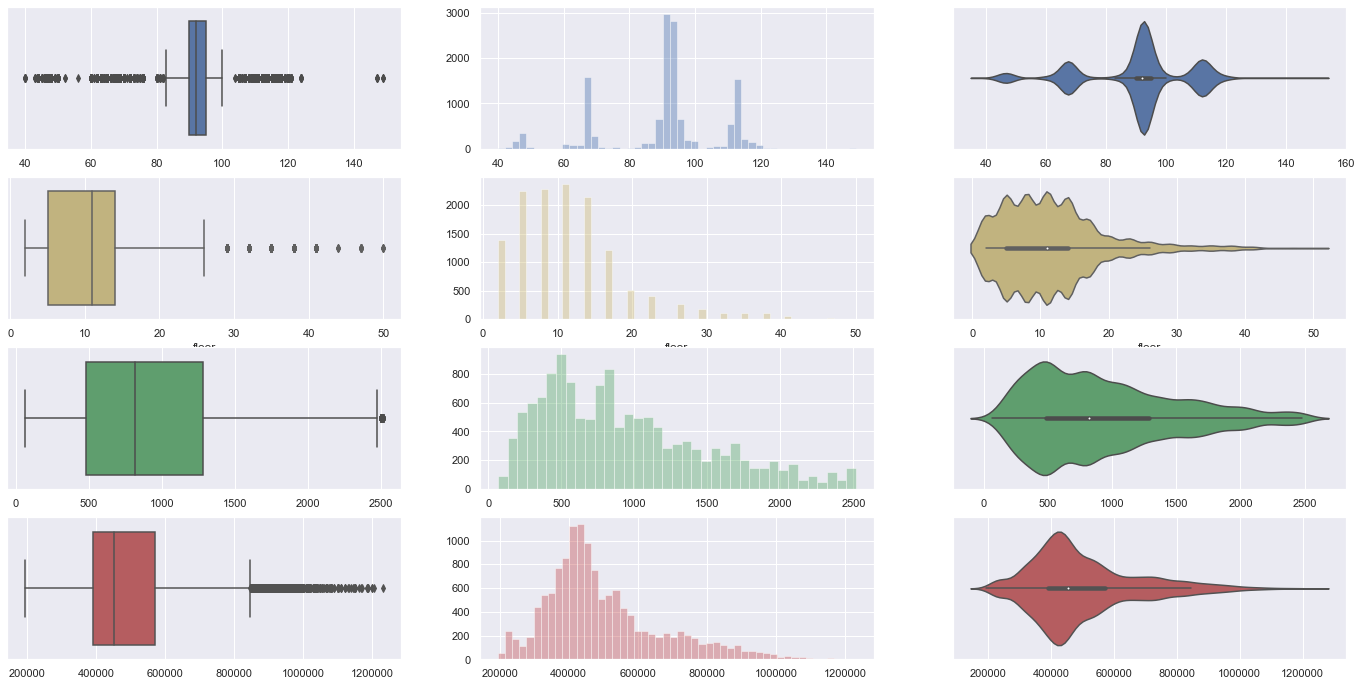

In [13]:
# Ploting boxplot, distplot and violin plot for floor_area_sqm, distanceWithMrt, storey_range and resale_price only.
# lat and long is not needed beacuse it will be visualized on the map of singpaore instead of these plots.
# lease_commence_date is not needed because all the data points are from our targetted timeframe. 

f, axes = plt.subplots(4, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for floor_area_sqm
sb.boxplot(floor_area_sqm, orient = "h", ax = axes[0,0])
sb.distplot(floor_area_sqm, kde = False, ax = axes[0,1])
sb.violinplot(floor_area_sqm, ax = axes[0,2])

# Plot the basic uni-variate figures for storey_range
sb.boxplot(BTO_data['floor'], orient = "h", ax = axes[1,0], color = 'y')
sb.distplot(BTO_data['floor'], kde = False, ax = axes[1,1], color = 'y')
sb.violinplot(BTO_data['floor'], ax = axes[1,2], color = 'y')

# Plot the basic uni-variate figures for distanceWithMrt
sb.boxplot(distanceWithMrt, orient = "h", ax = axes[2,0], color = 'g')
sb.distplot(distanceWithMrt, kde = False, ax = axes[2,1], color = 'g')
sb.violinplot(distanceWithMrt, ax = axes[2,2], color = 'g')

# Plot the basic uni-variate figures for resale_price
sb.boxplot(resale_price, orient = "h", ax = axes[3,0], color = 'r')
sb.distplot(resale_price, kde = False, ax = axes[3,1], color = 'r')
sb.violinplot(resale_price, ax = axes[3,2], color = 'r')

In [19]:
# from the plots, majority of the HDBs are close within 500m to 1250m from the MRT and average resale value of $500,000.

# from the distplot for floor_area_sqm, it is clear that the data split into distinct categories

4 ROOM    7800
5 ROOM    2762
3 ROOM    2227
2 ROOM     606
Name: flat_type, dtype: int64


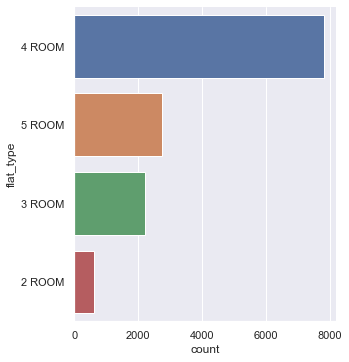

In [20]:
print(BTO_data['flat_type'].value_counts())
sb.catplot(y = "flat_type", data = BTO_data, kind = "count")

In [ ]:
# from comparing the displot of floor_area_sqm and countplot of flat_types,
# we can conclude that the categories of the floor_area_sqm is the number of rooms of the HDB  
# 40 - 55 sqm = 2 Room
# 60 - 80 sqm = 3 Room
# 85 - 100 sqm = 4 Room
# 105 - 120 sqm = 5 Room

# From the countplot, we can also see that majority of the HDBs sold were 4 room flats. 

In [15]:
from IPython.core.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 12px; }</style>"))

# Since we are interested in finding the highest price we can sell the BTO,
# We need to find how each of the factors affect the resale price of the HDB.

# Relationship between the location (town) and resale price


In [16]:
# We will plot the resale price of the HDB on the google map of Singapore. 
# We will make use of the 'long' and 'lat' in the data sheet to plot the data points on the map.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

# import image of Singapore 
singapore_img = mpimg.imread('miniprojectSingapore.png')

# plot the data
ax = leasecommence_2005.plot(
    kind="scatter", 
    x= "long", 
    y= "lat", 
    figsize=(20,14),
    c="resale_price", 
    cmap=plt.get_cmap("jet"),
    colorbar=True, 
    alpha=0.4,
)
# use our map with it's bounding coordinates
plt.imshow(singapore_img, extent=[103.5,104,1.15, 1.50], alpha=0.5)            
# add axis labels
plt.ylabel("Latitude", fontsize=20)
plt.xlabel("Longitude", fontsize=20)
# set the min/max axis values - these must be the same as above
plt.ylim(1.15, 1.50)
plt.xlim(103.5, 104)
plt.legend(fontsize=20)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'miniprojectSingapore.png'

In [23]:
# From the map, we can see that resale price of the HDB is related to the location of the HDB
# The area with the highest resale value is in the downtown region. 
# The further the HDB is located from the downtown area, its resale price decreases, with the exception of Toa Payoh and Ang Mo Kio towns

# Relationship between the floor area (sqm) and resale price

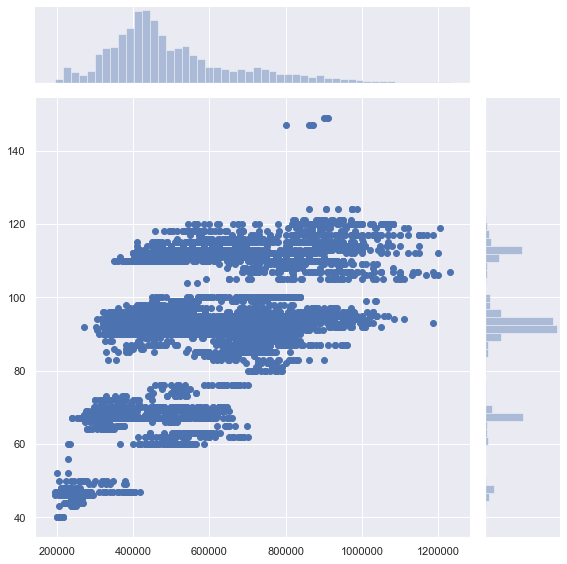

In [19]:
sb.jointplot(resale_price, floor_area_sqm, height = 8)

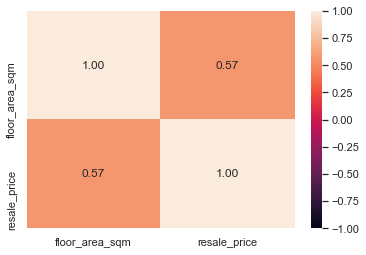

In [17]:
jointDF = pd.concat([floor_area_sqm, resale_price], axis = 1)

sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [26]:
# Hence, we can see that there is a positive corelation between the floor area and the resale price. 
# The greater the floor area, the higher the resale price.
# As established above, the floor area is related to the flat type (no. of rooms). 
# Therefore, the bigger the HDB (more number of rooms), the higher the resale price.

Train Set : (10046, 1) (10046, 1)
Test Set  : (3349, 1) (3349, 1)
Intercept of Regression 	: b =  [-19054.84605443]
Coefficients of Regression 	: a =  [[5738.14648827]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.32847218222158514
Mean Squared Error (MSE) 	: 19392051152.957787

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.33404257168904705
Mean Squared Error (MSE) 	: 19032488276.207775



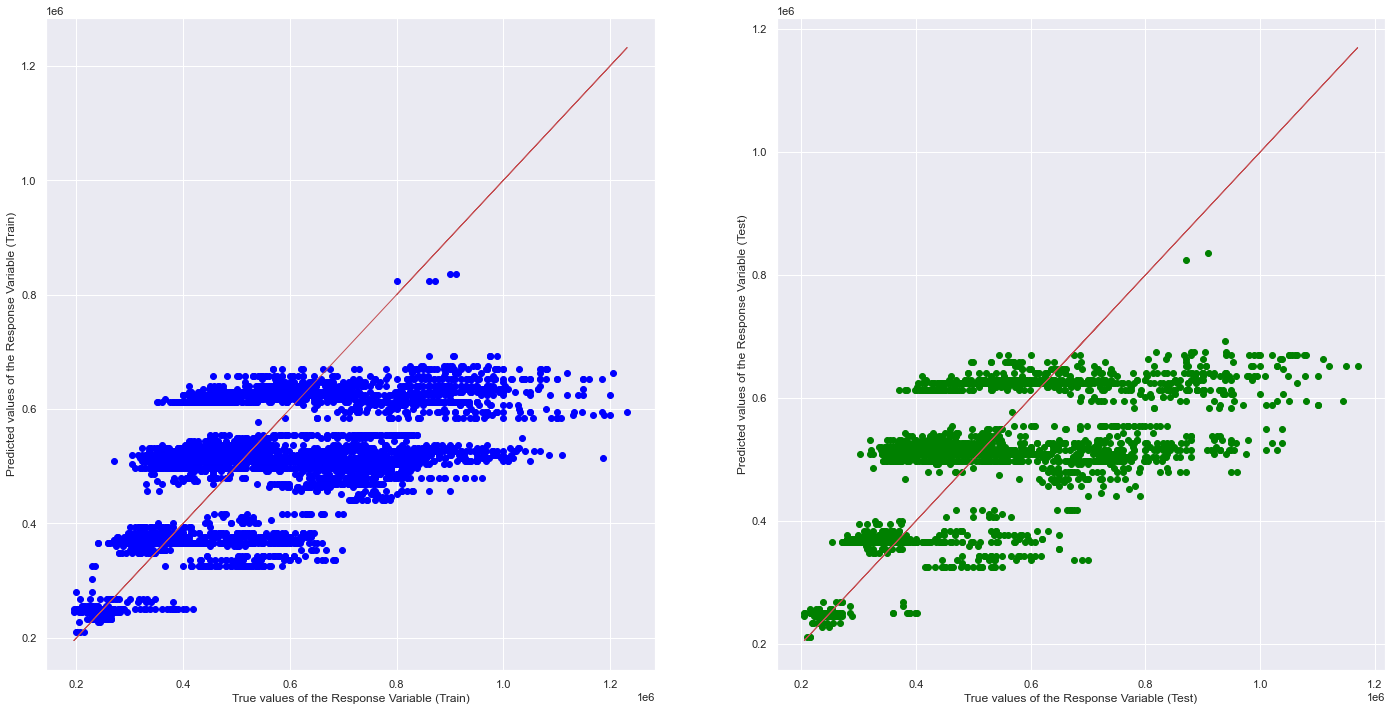

In [27]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Recall the resale_price - Floor Dataset
resale_price = pd.DataFrame(BTO_data['resale_price'])         # Response
floor_area_sqm = pd.DataFrame(BTO_data['floor_area_sqm'])     # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(floor_area_sqm, resale_price , test_size = 0.25)

# Checking the number of data points in the Train and Test Datas
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict resale_price values corresponding to floor
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [20]:
# We will plot the floor area of the HDB on the google map of Singapore. 
# We will make use of the 'long' and 'lat' in the data sheet to plot the data points on the map.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

# import image of Singapore 
singapore_img = mpimg.imread('miniprojectSingapore.png')

# plot the data
ax = leasecommence_2005.plot(
    kind="scatter", 
    x= "long", 
    y= "lat", 
    figsize=(20,14),
    c="floor_area_sqm", 
    cmap=plt.get_cmap("jet"),
    colorbar=True, 
    alpha=0.4,
)
# use our map with it's bounding coordinates
plt.imshow(singapore_img, extent=[103.5,104,1.15, 1.50], alpha=0.5)            
# add axis labels
plt.ylabel("Latitude", fontsize=20)
plt.xlabel("Longitude", fontsize=20)
# set the min/max axis values - these must be the same as above
plt.ylim(1.15, 1.50)
plt.xlim(103.5, 104)
plt.legend(fontsize=20)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'miniprojectSingapore.png'

In [29]:
# from the map we can see that majority of 5 room flats are in Punggol 
# while the eastern, central, and along west coast mainly comprises of 3 room and 4 room flats (mature estates). 
#So the conclusion is that mature estates generally have smaller BTOs as compared to new estates. 


# Relationship between the story range and resale price

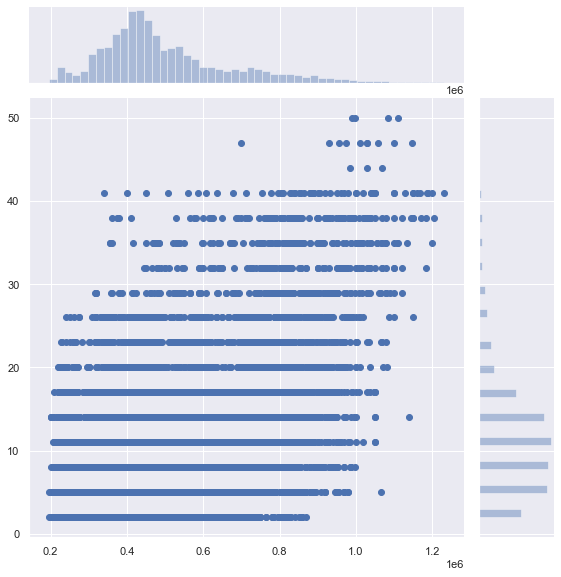

In [30]:
sb.jointplot(resale_price, floor, height = 8)

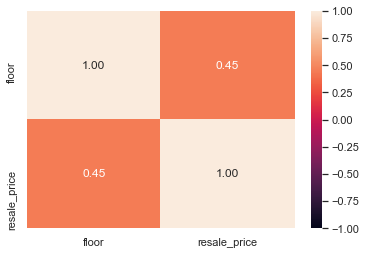

In [31]:
jointDF = pd.concat([floor, resale_price], axis = 1)

sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

Train Set : (10046, 1) (10046, 1)
Test Set  : (3349, 1) (3349, 1)
Intercept of Regression 	: b =  [384549.61446047]
Coefficients of Regression 	: a =  [[10019.99191463]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.1952839886817992
Mean Squared Error (MSE) 	: 23118361982.36851

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.20748848766561911
Mean Squared Error (MSE) 	: 23025220907.12713



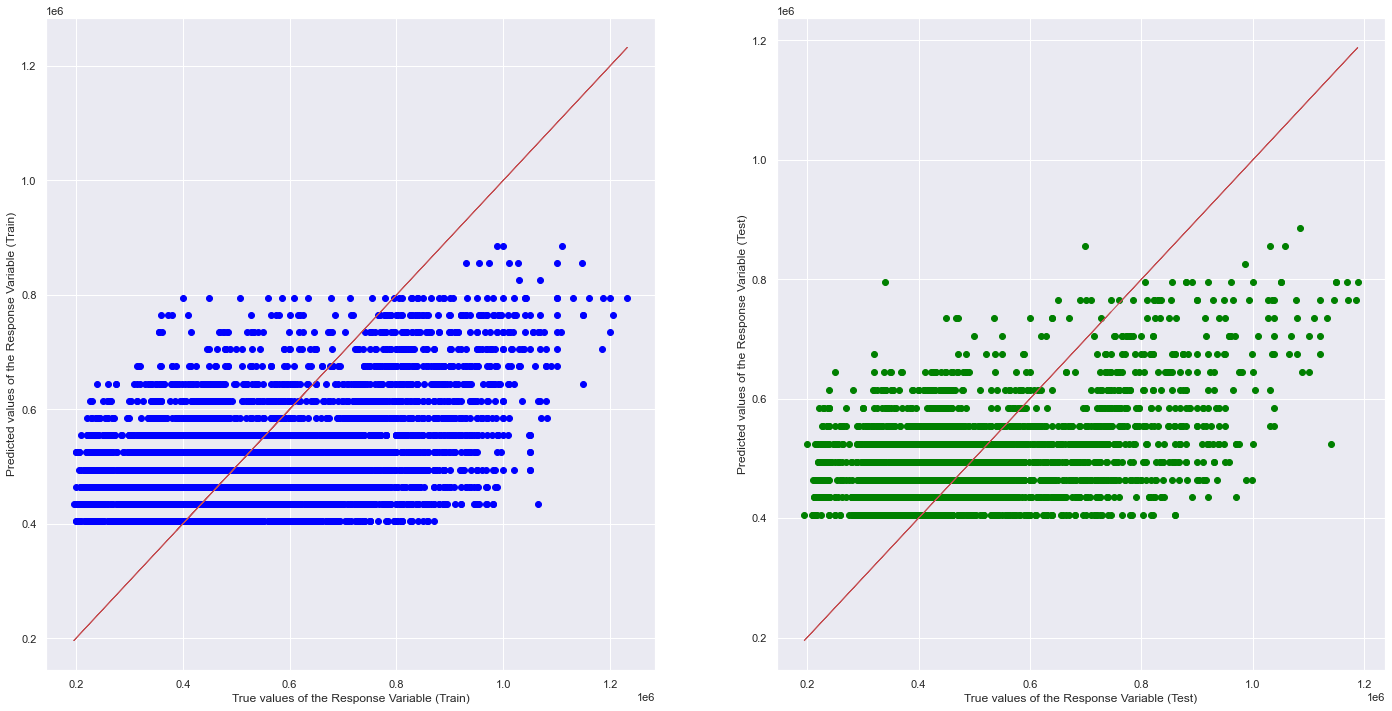

In [32]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Recall the resale_price - Floor Dataset
resale_price = pd.DataFrame(BTO_data['resale_price'])         # Response
floor = pd.DataFrame(BTO_data['floor'])                       # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(floor, resale_price , test_size = 0.25)

# Checking the number of data points in the Train and Test Datas
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict resale_price values corresponding to floor
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [33]:
# The root mean square error for train and test is more or less consistent with each other.
# This tells us that the values in train and test data is more or less consistent as shown in the linear regression plots.
# Hence we can see that there is a positive relationship between the floor and resale price
# The higher the unit is located, the higher the resale value

# Relationship between the Distance with MRT and resale price

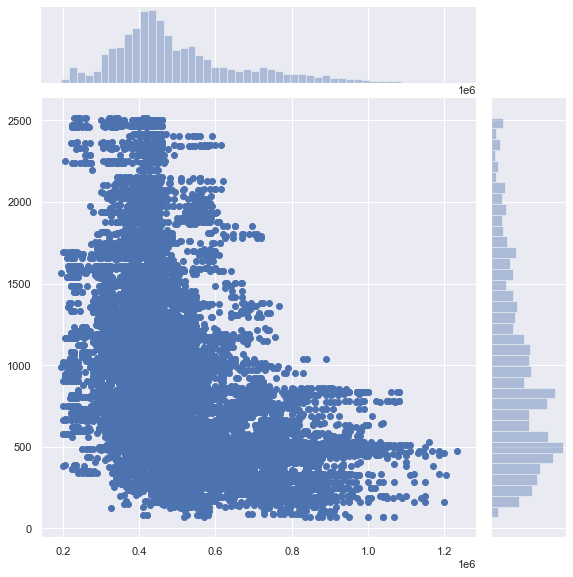

In [34]:
# Jointplot
sb.jointplot(resale_price, distanceWithMrt, height = 8)


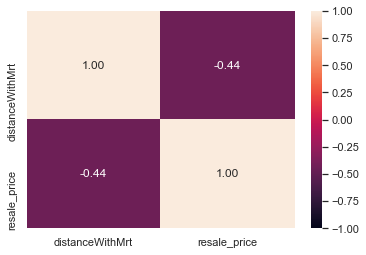

In [35]:
# Heat map
jointDF = pd.concat([distanceWithMrt, resale_price], axis = 1)

sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

Train Set : (10046, 1) (10046, 1)
Test Set  : (3349, 1) (3349, 1)
Intercept of Regression 	: b =  [623725.54314427]
Coefficients of Regression 	: a =  [[-132.17338594]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.19557913545486116
Mean Squared Error (MSE) 	: 22872261063.758472

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.19620736017562668
Mean Squared Error (MSE) 	: 24069067330.554066



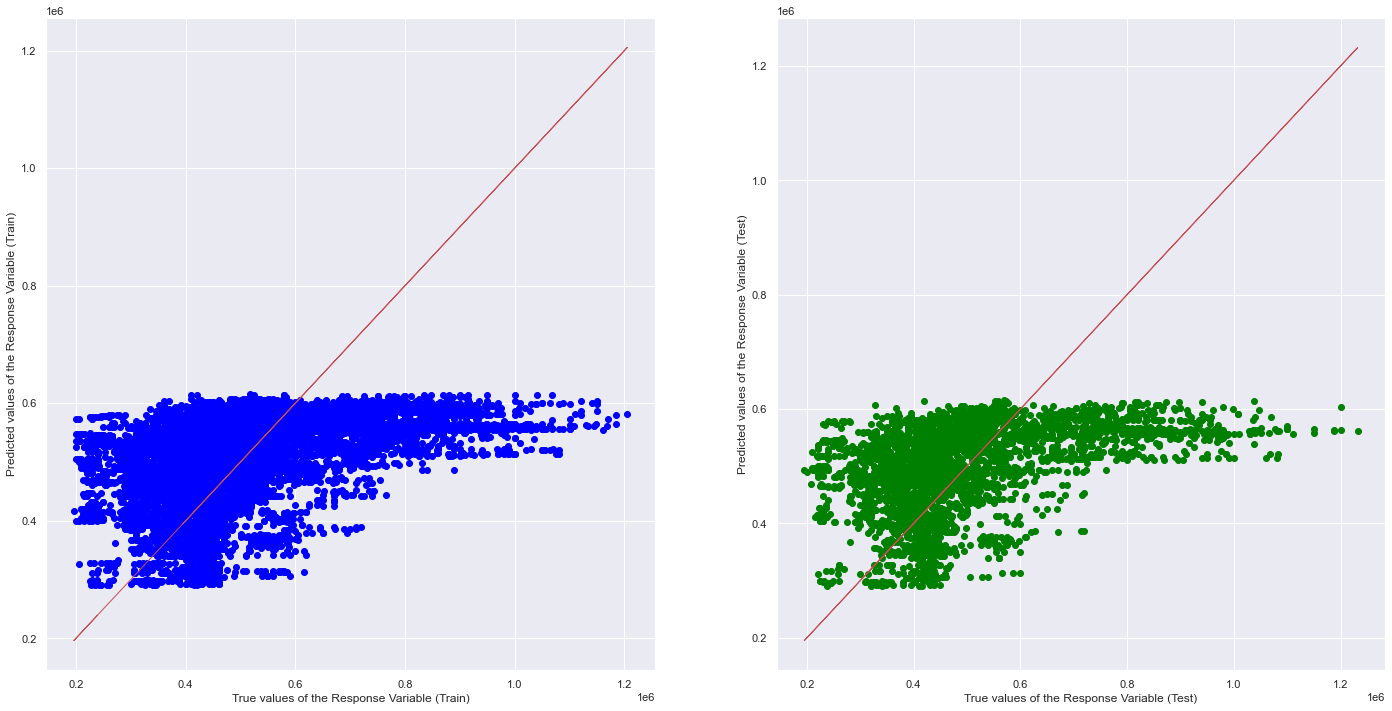

In [36]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Recall the resale_price - Floor Dataset
resale_price = pd.DataFrame(BTO_data['resale_price'])         # Response
distanceWithMrt = pd.DataFrame(BTO_data['distanceWithMrt'])                       # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(distanceWithMrt, resale_price , test_size = 0.25)

# Checking the number of data points in the Train and Test Datas
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict resale_price values corresponding to floor
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [37]:
# The root mean square error for train and test is more or less consistent with each other.
# This tells us that the values in train and test data is more or less consistent as shown in the linear regression plots. 
# Hence, we can see that there is a negative correlation between the distance with the MRT and the resale price. 
# The nearer the distance to the MRT, the higher the resale price.

# Prediction of resale price considering distance with MRT, Floor and Floor Area

Intercept of Regression 	: b =  [22064.30004619]
Coefficients of Regression 	: a =  [[-117.15392672 9091.27457704 5351.98345847]]

        Predictors  Coefficients
0  distanceWithMrt   -117.153927
1            floor   9091.274577
2   floor_area_sqm   5351.983458



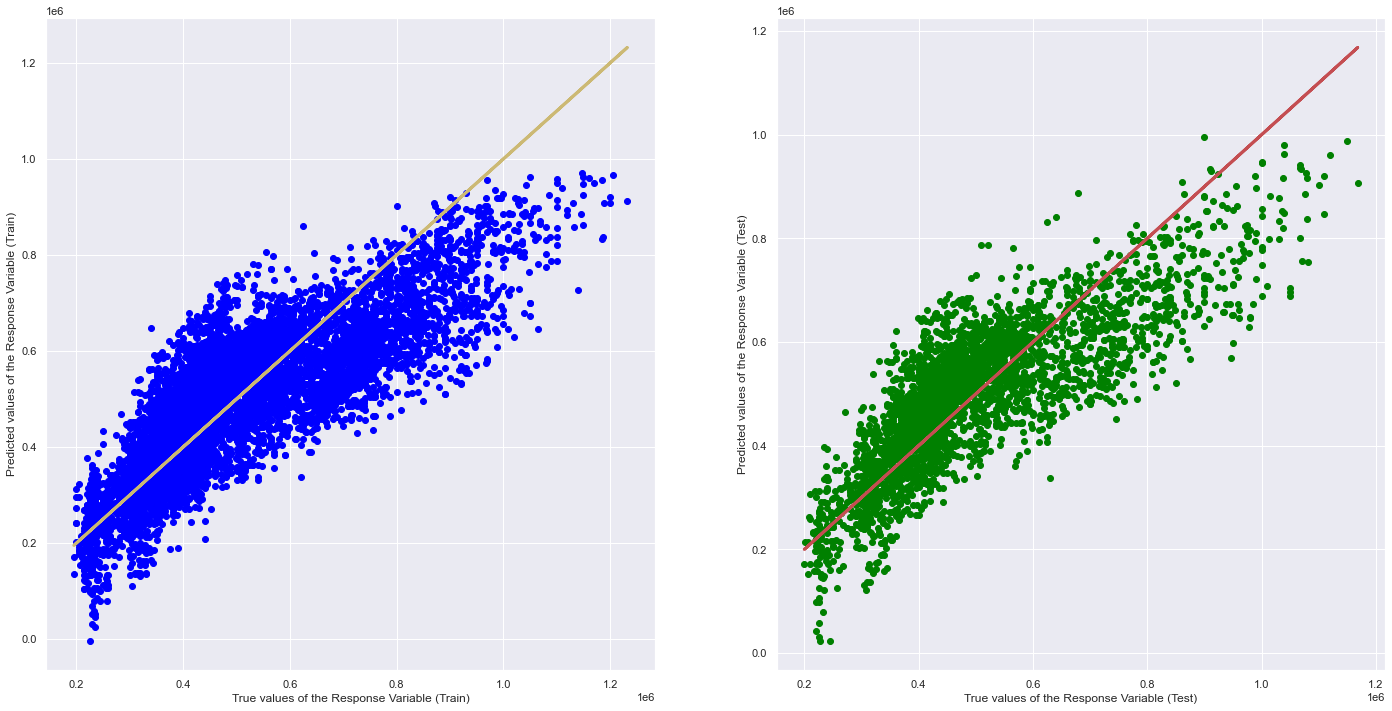

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6543921353478908
Mean Squared Error (MSE) 	: 10010179891.087425

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6610353996438985
Mean Squared Error (MSE) 	: 9610131271.981611



In [38]:
predictors = ["distanceWithMrt", "floor", "floor_area_sqm"]

y = resale_price
X = pd.DataFrame(BTO_data[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'y', linewidth = 3)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 3)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Predicting the Ang Mo Kio resale prices

In [39]:
# Extract data for Prediction
BTOAMK_pred = BTO_data[BTO_data["addresses"].isin(["307C ANG MO KIO AVE 1"])]
BTOAMK_pred

,town,addresses,flat_type,storey_range,floor_area_sqm,distanceWithMrt,lat,long,lease_commence_date,resale_price,floor
44,ANG MO KIO,307C ANG MO KIO AVE 1,4 ROOM,16 TO 18,88.0,689.479121,1.365561,103.845169,2012,635000.0,17
7774,ANG MO KIO,307C ANG MO KIO AVE 1,3 ROOM,10 TO 12,70.0,689.479121,1.365561,103.845169,2012,470000.0,11
7788,ANG MO KIO,307C ANG MO KIO AVE 1,4 ROOM,04 TO 06,88.0,689.479121,1.365561,103.845169,2012,500000.0,5
9693,ANG MO KIO,307C ANG MO KIO AVE 1,3 ROOM,10 TO 12,70.0,689.479121,1.365561,103.845169,2012,448000.0,11
23114,ANG MO KIO,307C ANG MO KIO AVE 1,3 ROOM,19 TO 21,70.0,689.479121,1.365561,103.845169,2012,400000.0,20
34054,ANG MO KIO,307C ANG MO KIO AVE 1,3 ROOM,10 TO 12,70.0,689.479121,1.365561,103.845169,2012,452000.0,11
34056,ANG MO KIO,307C ANG MO KIO AVE 1,3 ROOM,01 TO 03,70.0,689.479121,1.365561,103.845169,2012,370000.0,2
37829,ANG MO KIO,307C ANG MO KIO AVE 1,4 ROOM,19 TO 21,88.0,689.479121,1.365561,103.845169,2012,695000.0,20
43748,ANG MO KIO,307C ANG MO KIO AVE 1,3 ROOM,19 TO 21,70.0,689.479121,1.365561,103.845169,2012,470000.0,20
50051,ANG MO KIO,307C ANG MO KIO AVE 1,3 ROOM,13 TO 15,70.0,689.479121,1.365561,103.845169,2012,476000.0,14


In [40]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(BTOAMK_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = linreg.predict(X_pred)
y_pred

array([[566815.32581159],
       [415931.97609683],
       [457720.03088706],
       [415931.97609683],
       [497753.44729023],
       [415931.97609683],
       [334110.50490343],
       [594089.14954273],
       [497753.44729473],
       [443205.79983246],
       [470479.62356359]])

In [41]:
# Summarize the Actuals, Predictions and Errors
y_pred = pd.DataFrame(y_pred, columns = ["PredTotal"], index = BTOAMK_pred.index)
BTOAMK_acc = pd.concat([BTOAMK_pred[["addresses", "resale_price"]], y_pred], axis = 1)

y_errs = 100 * abs(BTOAMK_acc["resale_price"] - BTOAMK_acc["PredTotal"]) / BTOAMK_acc["resale_price"]
y_errs = pd.DataFrame(y_errs, columns = ["Error"], index = BTOAMK_pred.index)
BTOAMK_acc = pd.concat([BTOAMK_acc, y_errs], axis = 1)

BTOAMK_acc

,addresses,resale_price,PredTotal,Error
44,307C ANG MO KIO AVE 1,635000.0,566815.325812,10.737744
7774,307C ANG MO KIO AVE 1,470000.0,415931.976097,11.503835
7788,307C ANG MO KIO AVE 1,500000.0,457720.030887,8.455994
9693,307C ANG MO KIO AVE 1,448000.0,415931.976097,7.158041
23114,307C ANG MO KIO AVE 1,400000.0,497753.447290,24.438362
34054,307C ANG MO KIO AVE 1,452000.0,415931.976097,7.979651
34056,307C ANG MO KIO AVE 1,370000.0,334110.504903,9.699864
37829,307C ANG MO KIO AVE 1,695000.0,594089.149543,14.519547
43748,307C ANG MO KIO AVE 1,470000.0,497753.447295,5.904989
50051,307C ANG MO KIO AVE 1,476000.0,443205.799832,6.889538


In [42]:
# from the 11 predictions, we can see that 9 of the predictions is lower than the actual resale value.
# A possible explanation is that these HDBs are located in Ang Mo Kio.
# From the relationship between Town and resale price, we can see that Ang Mo Kio is generally higher priced. 
# Hence, the discrepency is due to the location factor that is not considered in this regression prediction.

# Predicting the Bukit Panjang resale prices

In [43]:
# Extract data for Prediction
BTOBP_pred = BTO_data[BTO_data["addresses"].isin(["633B SENJA RD"])]
BTOBP_pred

,town,addresses,flat_type,storey_range,floor_area_sqm,distanceWithMrt,lat,long,lease_commence_date,resale_price,floor
228,BUKIT PANJANG,633B SENJA RD,4 ROOM,01 TO 03,93.0,763.735743,1.38517,103.758529,2013,400000.0,2
229,BUKIT PANJANG,633B SENJA RD,4 ROOM,04 TO 06,93.0,763.735743,1.38517,103.758529,2013,400000.0,5
1302,BUKIT PANJANG,633B SENJA RD,4 ROOM,01 TO 03,93.0,763.735743,1.38517,103.758529,2013,400000.0,2
2671,BUKIT PANJANG,633B SENJA RD,4 ROOM,10 TO 12,93.0,763.735743,1.38517,103.758529,2013,433000.0,11
4579,BUKIT PANJANG,633B SENJA RD,4 ROOM,22 TO 24,93.0,763.735743,1.38517,103.758529,2013,468000.0,23
10203,BUKIT PANJANG,633B SENJA RD,4 ROOM,13 TO 15,93.0,763.735743,1.38517,103.758529,2013,443000.0,14
10204,BUKIT PANJANG,633B SENJA RD,4 ROOM,07 TO 09,93.0,763.735743,1.38517,103.758529,2013,425000.0,8
12658,BUKIT PANJANG,633B SENJA RD,4 ROOM,07 TO 09,93.0,763.735743,1.38517,103.758529,2013,423000.0,8
14716,BUKIT PANJANG,633B SENJA RD,4 ROOM,07 TO 09,93.0,763.735743,1.38517,103.758529,2013,450000.0,8
16701,BUKIT PANJANG,633B SENJA RD,4 ROOM,01 TO 03,93.0,763.735743,1.38517,103.758529,2013,399000.0,2


In [44]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(BTOBP_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = linreg.predict(X_pred)
y_pred

array([[448506.6695378 ],
       [475780.49326893],
       [448506.6695378 ],
       [530328.1407312 ],
       [639423.43565574],
       [557601.96446233],
       [503054.31700007],
       [503054.31700007],
       [503054.31700007],
       [448506.6695378 ],
       [612149.6119246 ],
       [612149.6119246 ],
       [693971.083118  ],
       [503054.31700007],
       [584875.78819347],
       [475780.49326643],
       [503054.31699757],
       [475780.49326643],
       [503054.31699757]])

In [45]:
# Summarize the Actuals, Predictions and Errors
y_pred = pd.DataFrame(y_pred, columns = ["PredTotal"], index = BTOBP_pred.index)
BTOBP_acc = pd.concat([BTOBP_pred[["addresses", "resale_price"]], y_pred], axis = 1)

y_errs = 100 * abs(BTOBP_acc["resale_price"] - BTOBP_acc["PredTotal"]) / BTOBP_acc["resale_price"]
y_errs = pd.DataFrame(y_errs, columns = ["Error"], index = BTOBP_pred.index)
BTOBP_acc = pd.concat([BTOBP_acc, y_errs], axis = 1)

BTOBP_acc

,addresses,resale_price,PredTotal,Error
228,633B SENJA RD,400000.0,448506.669538,12.126667
229,633B SENJA RD,400000.0,475780.493269,18.945123
1302,633B SENJA RD,400000.0,448506.669538,12.126667
2671,633B SENJA RD,433000.0,530328.140731,22.477631
4579,633B SENJA RD,468000.0,639423.435656,36.628939
10203,633B SENJA RD,443000.0,557601.964462,25.869518
10204,633B SENJA RD,425000.0,503054.317000,18.365722
12658,633B SENJA RD,423000.0,503054.317000,18.925370
14716,633B SENJA RD,450000.0,503054.317000,11.789848
16701,633B SENJA RD,399000.0,448506.669538,12.407687


In [46]:
# from the 19 predictions, we can see that all of the predictions is higher than the actual resale value.
# A possible explanation is that these HDBs are located in Bukit Panjang.
# From the relationship between Town and resale price, we can see that Bukit Panjang is generally lower priced. 
# Hence, the discrepency is due to the location factor that is not considered in this regression prediction.

# Hence, from the predictions between Ang Mo Kio and Bukit Panjang with the Resale Price, we can see that the location of the HDB has a greater influence on getting a higher Resale Price as compared to the distance with MRT, floor and floor area.

# Determining the next most important factor after Town location

In [47]:
# Converting resale_price from float to boolean
# From our calculation, the average cost of a BTO is $315,000
# Hence, our goal is to sell it for at least double the price at > $630,0000

BTO_data.loc[BTO_data['resale_price'] <= 630000.0, 'equal_or_lower_than_630000'] = False 
BTO_data.loc[BTO_data['resale_price'] > 630000.0, 'equal_or_lower_than_630000'] = True 

# In this boolean range, when the resale_price > $630,000. The boolean is True. 

resale_price_boolean = BTO_data['equal_or_lower_than_630000'].map({False : False, True: True})

resale_price_bool = pd.DataFrame(resale_price_boolean)
resale_bool = pd.DataFrame(resale_price_bool.astype(bool))
resale_bool.head()

,equal_or_lower_than_630000
43,False
44,True
49,False
51,True
52,True


In [48]:
resale_bool.describe()

,equal_or_lower_than_630000
count,13395
unique,2
top,False
freq,10807


In [49]:
# We can see that 10807 out of 13395 resale HDBs are less than $635,000. 
# Our goal is to determine which factor (out of the 3) has the greatest influence on the resale price. 

Train Set : (10046, 1) (10046, 3)
Test Set  : (3349, 1) (3349, 3)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8508859247461676

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8659301283965363



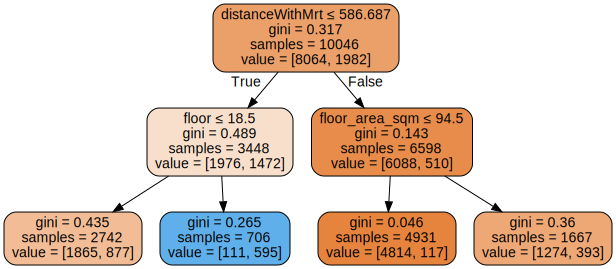

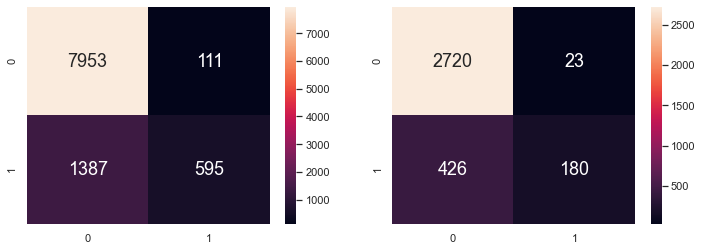

In [52]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
y = resale_bool
X = pd.DataFrame(BTO_data[['floor', 'distanceWithMrt', 'floor_area_sqm']])      

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Checking the size of train gnad test data
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

# From the graphic tree, we can see that Distance with MRT is the most important factor in ensuring a higher resale price. 

# Floor Area provides the next most accurate prediction of resale price < 630,000 as the gini is the lowest.

# Hence, in order to get a higher resale price for your BTO, you should prioritize the factors as follows:

# 1. Location: Nearer to Downtown
# 2. Distance with MRT: Nearer to an MRT
# 3. Floor Area: Bigger BTO size ( 4 or 5 rooms)
# 4. Unit Floor level: Higher than 19th floor
